In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.shape

(1309, 3)

In [4]:
df.sample(5)

,Age,Fare,Survived
978,27.0,8.6625,1
625,17.0,7.9250,1
869,28.0,22.5250,0
355,36.0,13.0000,1
286,63.0,221.7792,0


In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(1045, 3)

<AxesSubplot:xlabel='Age', ylabel='Count'>

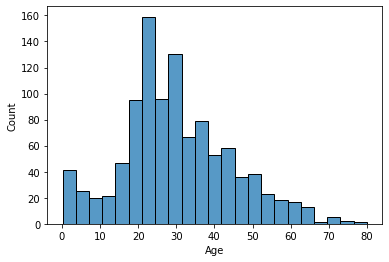

In [7]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

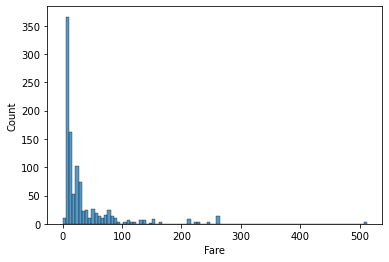

In [8]:
sns.histplot(df['Fare'])

In [9]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [10]:
X

,Age,Fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500
...,...,...
1301,45.5000,7.2250
1304,14.5000,14.4542
1306,26.5000,7.2250
1307,27.0000,7.2250


In [11]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: Survived, Length: 1045, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [13]:
X_train

,Age,Fare
128,47.0,38.5000
377,8.0,26.2500
850,21.0,7.8542
684,32.0,15.5000
1231,29.0,10.4625
...,...,...
505,48.0,13.0000
402,30.0,13.8583
774,43.0,7.8958
486,24.0,10.5000


In [14]:
y_train

128     0
377     1
850     0
684     0
1231    0
       ..
505     0
402     1
774     0
486     0
198     1
Name: Survived, Length: 731, dtype: int64

# Binning

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [16]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [17]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [18]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [20]:
model.fit(X_train_trf,y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test_trf)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7038216560509554

In [23]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy'))

0.6360897435897435